## 전국 시도 대통령 선거 결과

In [1]:
# local에서 장고로 브라우저 실행
#import django
# from selenium import webdriver

# browser = webdriver.Chrome('chromedriver')
# # chromedriver가 Python파일과 같은 위치에 있거나, 혹은 OS의 PATH에 등록되어 쉘에서 실행 가능한 경우 위와같이 한다.
# # 혹은 browser = webdriver.Chrome('/path/to/chromedriver')의 절대경로로 해도 된다.
# browser.get('http://localhost:8000')

# assert 'Django' in browser.title

# $ django-admin startproject tdd_study_proj
# $ python manage.py runserver
# http://127.0.0.1:8000

In [20]:
from selenium import webdriver
import time
# time.sleep(1) 사용하기 위해 1초동안 
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
election_result_raw = {'광역시도':[],
                       '시군':[],
                       'pop':[],
                       'moon':[],
                       'hong':[],
                       'ahn':[]
                      }

In [4]:
import re
def get_num(tmp):
    return re.split('\(', tmp)[0].replace(",", "") # 

In [5]:
# 제어 브라우저 작동(윈도우)
# driver=webdriver.Chrome("chromedriver")
# time.sleep(1)

# 제어 브라우저 작동(리눅스)
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
time.sleep(1)

chrome_options=webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver= webdriver.Chrome('/usr/bin/chromedriver', chrome_options=chrome_options)
time.sleep(1)



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: use options instead of chrome_options
  from ipykernel import kernelapp as app


In [6]:
#선관위 홈페이지 가져오기 get
driver.get("http://info.nec.go.kr/main/showDocument.xhtml?electionId=0000000000&topMenuId=VC&secondMenuId=VCCP09")
time.sleep(1)

#대통령선거 id, click
driver.find_element_by_id("electionType1").click()
time.sleep(1)

# 제19대 선택 id, send_keys
driver.find_element_by_id("electionName").send_keys("제19대")
time.sleep(1)

# 대통령선거 선택 id, send_keys
driver.find_element_by_id("electionCode").send_keys("대통령선거")
time.sleep(1)

# 시도이름 선택 select id
sido_list_raw = driver.find_element_by_id("cityCode")
time.sleep(1)

# 시도이름 선택 option tag
sido_list = sido_list_raw.find_elements_by_tag_name("option")
time.sleep(1)

In [7]:
#시도이름 추출
sido_names_vales=[op.text for op in sido_list]
sido_names_vales=sido_names_vales[2:] # 합계, 선택 제외
sido_names_vales

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [8]:
for each_sido in sido_names_vales:
    
    # 시도이름 선택 select id
    element = driver.find_element_by_id("cityCode")
    element.send_keys(each_sido)

    #검색버튼 틀릭 click
    driver.find_element_by_id("searchBtn").click()

    #     #시도코드 선택 send_keys
    #     driver.find_element_by_id("cityCode").send_keys(each_sido)

    # 소스코드 전체파싱
    html = driver.page_source

    # 소스코드 받아오기
    soup = BeautifulSoup(html, "html.parser")

    # 테이블 soup에 넣기
    table = soup.find(id="table01")

    # df 문자열로 바뀐 상태에서 문자열만 추출해 내어 데이터프레임형태로 list에 저장
    df=pd.read_html(str(table))
    
    #print(f'df[0].values[1:]:{df[0].values[1:]}')
    
    for each in df[0].values[1:]:
        election_result_raw['광역시도'].append(each_sido)
        election_result_raw['시군'].append(each[0])
        election_result_raw['pop'].append(each[2])  # popular 인구수
        election_result_raw['moon'].append(get_num(each[3]))
        election_result_raw['hong'].append(get_num(each[4]))
        election_result_raw['ahn'].append(get_num(each[5]))
    

In [9]:
#election_result_raw

In [10]:
columns = []
for key in election_result_raw.keys():
    columns.append(key)
columns

['광역시도', '시군', 'pop', 'moon', 'hong', 'ahn']

In [11]:
election_result = pd.DataFrame(election_result_raw,columns = columns)
#election_result.info()
election_result.head()

,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566,42512,22325,22313
1,서울특별시,중구,82852,34062,17901,19372
2,서울특별시,용산구,148157,58081,35230,32109
3,서울특별시,성동구,203175,86686,40566,45674
4,서울특별시,광진구,240030,105512,46368,52824


In [12]:
election_result.to_csv('./election_result.csv', encoding='utf-8',sep=',')

In [13]:
#윈도우
#driver.close()

# 리눅스
driver.quit()

## 시각화

In [14]:
df=pd.read_csv('./election_result.csv', encoding='utf-8', index_col=0)
df.head()

,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566,42512,22325,22313
1,서울특별시,중구,82852,34062,17901,19372
2,서울특별시,용산구,148157,58081,35230,32109
3,서울특별시,성동구,203175,86686,40566,45674
4,서울특별시,광진구,240030,105512,46368,52824


In [15]:
df2=df.drop("시군", axis=1).groupby('광역시도').sum()
df2.head()

,pop,moon,hong,ahn
광역시도,,,,
강원도,955885,324768,284909,206840
경기도,7916009,3319812,1637345,1807308
경상남도,2135055,779731,790491,284272
경상북도,1711627,369726,827237,253905
광주광역시,957321,583847,14882,287222


In [43]:
#사용가능한 ttf폰트 목록(리눅스용)
import matplotlib
import matplotlib.font_manager

#[f.fname for f in matplotlib.font_manager.fontManager.ttflist]

# 설치된 폰트 출력
# font_list = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
# font_list

['cmsy10',
 'cmex10',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'cmmi10',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Serif',
 'DejaVu Sans',
 'cmtt10',
 'STIXGeneral',
 'DejaVu Serif Display',
 'STIXSizeTwoSym',
 'STIXSizeFourSym',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'STIXGeneral',
 'DejaVu Sans Display',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'NanumGothicCoding',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'NanumGothicCoding',
 'cmss10',
 'cmb10',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXSizeFiveSym',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'DejaVu Sans',
 'cmr10',
 'STIXSizeOneSym',
 'STIXSizeOneSym',
 'STIXGeneral',
 'Latin Modern Roman',
 'Latin Modern Roman',
 'Latin Modern Mono Light',
 'Latin Modern Roman',
 'Latin Modern Roman',
 'Latin Modern Roman',
 'Latin Modern Roman Demi',
 'Latin Modern Roman',
 'Latin Modern Roman',
 'Latin Modern Mono Light',
 'Latin Modern Sans',
 'Latin Modern Sans',
 'Latin M

In [44]:
#한글 
plt.rc('font', family= 'NanumGothicCoding')
#plt.rcParams['font.family'] = 'NanumGothicCoding

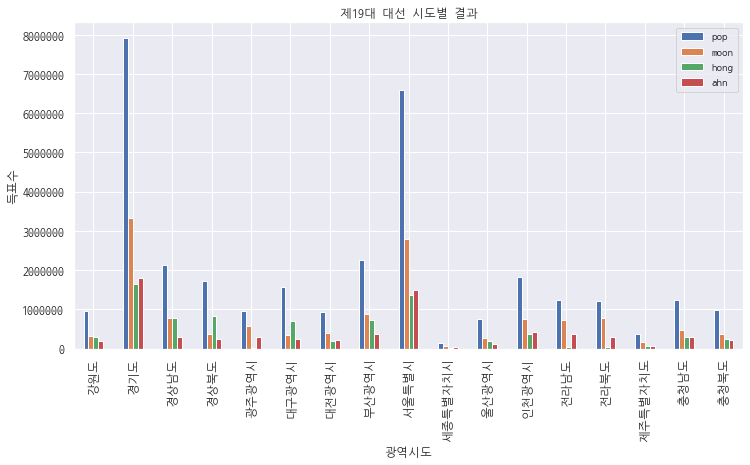

In [46]:
# 판다스로 plot 구현
df2.plot(kind='bar', title='제19대 대선 시도별 결과', figsize=(12, 6), legend=True, fontsize=12)
#plt.rcParams['figure.figsize'] = [18, 12] # plt.figure(figuresize=(,))  #plt.figure(dpi = 300)
#plt.title('제19대 대선 시도별 결과')
plt.ylabel('득표수')
plt.show()

Text(0, 0.5, '득표수')

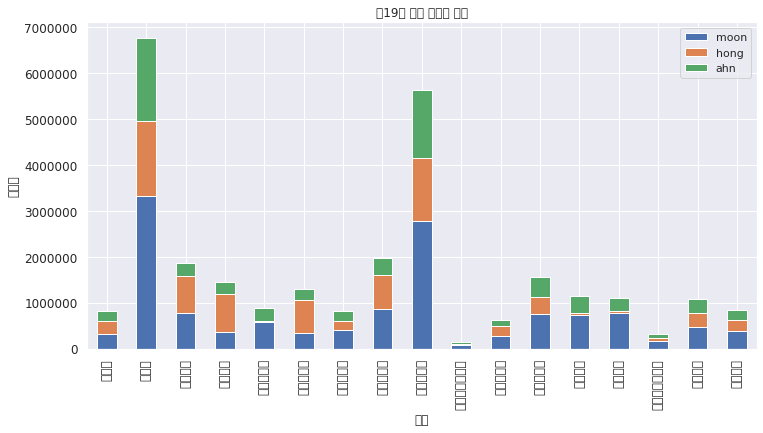

In [51]:
# 판단스와 시본으로 구현
import seaborn as sns
df3=df2.drop('pop', axis=1)
sns.set()
ax=df3.plot(kind='bar', stacked=True, title='제19대 대선 시도별 결과', figsize=(12, 6), legend=True, fontsize=12)
#plt.rcParams['figure.figsize'] = [24, 16] # plt.figure(figuresize=(,))  #plt.figure(dpi = 300)
#plt.title('제19대 대선 시도별 결과')
ax.set_xlabel('시도', fontsize=12)          # x축 정보 표시
ax.set_ylabel('득표수', fontsize=12)     # y축 정보 표시
#ax.legend( ['', '습도'], fontsize=12) 
#plt.ylabel('득표수')
#plt.show()


In [19]:
# import seaborn as sns
# plt.figure(dpi = 300)
# #plt.rcParams['figure.figsize'] = [8, 6] # setting figure size

# # tips_sum_by_day_sex = pd.DataFrame(tips.groupby(['day', 'sex']).tip.sum())
# # tips_sum_by_day_sex = tips_sum_by_day_sex.reset_index()
# # tips_sum_by_day_sex
# # 출처: https://rfriend.tistory.com/411 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

# pd.DataFrame(df.groupby([]))
#['광역시도', '시군', 'pop', 'moon', 'hong', 'ahn']

# 다차원복합데이터
#sns.barplot(x="temperature", y="humidity", hue="point", data=city_df) # hue label 
#sns.barplot(x="temperature", y="humidity", hue="point", data=city_nd)

# 2차원복합데이터
# sns.barplot(x="시군", y="최대승객수", data=df_t, hue='지하철역') # 2차원 복합 ===> 성공
# data : DataFrame, array, or list of arrays,
# x, y, hue : names of variables in ``data`` or vector data, optional
#     Inputs for plotting long-form data. See examples for interpretation.    

# 1차원데이터
#sns.distplot(df, kde=True, rug=True) # error # Series, 1d-array, or list.

# catplot  => 실패
# sns.catplot(x="temperature", y="humidity", hue="point", row="humidity", data=city_df,
#             kind="bar", split=False, height=2, aspect=4)


# Stacked Bar Chart
# sns.barplot(x='day', y='tip', hue='sex', data=tips_sum_by_day_sex, 
#            dodge=False) # stacked bar chart
# plt.title('Stacked Bar Chart by Seaborn', fontsize='20')
# plt.show()

# # Dodged Bar Chart
# sns.barplot(x='pop', y='moon', hue='광역시도', data=df) # default : dodge=True
# plt.title('Dodged Bar Chart by Seaborn 서울광역시', fontsize=20)
# plt.legend(fontsize=12)
# plt.show()

#['광역시도', '시군', 'pop', 'moon', 'hong', 'ahn']
#plt.title("서울 2019년 1월 시간대별 최대 승차한 지하철")
#plt.legend()
#plt.show()

ValueError: No group keys passed!

<Figure size 7200x4800 with 0 Axes>